# **TikTok Project**
**Stage 5 - Regression Analysis: Simplify complex data relationships**

During all the stages of this project, I've been working on building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion (all this is focused on the Tik Tok platform). With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

At this point, I have completed the initial Python coding work, EDA, and hypothesis testing.

After reviewing the results of the hypothesis testing, it would be good to check how different variables are associated with whether a user is verified. It seems that if a user is verified, they are much more likely to post opinions. Now, it's time to explore how to predict verified status to help understand how video characteristics relate to verified users. Therefore, in this notebook, a logistic regression will be conducted using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [127]:
# Import packages for data manipulation
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Import packages for data modeling
import sklearn.metrics as metrics
from statsmodels.formula.api import ols
from sklearn.metrics import classification_report

In [128]:
# Load dataset into dataframe
data = pd.read_csv("../dataset/tiktok_dataset.csv")

### **Task 2a. Explore data with EDA**
Let's analyze the data and check for and handle missing values and duplicates.

In [129]:
# Display first few rows
data.head(5)

# claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0

In [130]:
# Get number of rows and columns
data.shape

(19382, 12)

In [131]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [132]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [133]:
# Generate basic descriptive stats
data.describe()

#      video_id  video_duration_sec  video_view_count  \
count  19382.000000  1.938200e+04        19382.000000      19084.000000   
mean    9691.500000  5.627454e+09           32.421732     254708.558688   
std     5595.245794  2.536440e+09           16.229967     322893.280814   
min        1.000000  1.234959e+09            5.000000         20.000000   
25%     4846.250000  3.430417e+09           18.000000       4942.500000   
50%     9691.500000  5.618664e+09           32.000000       9954.500000   
75%    14536.750000  7.843960e+09           47.000000     504327.000000   
max    19382.000000  9.999873e+09           60.000000     999817.000000   

       video_like_count  video_share_count  video_download_count  \
count      19084.000000       19084.000000          19084.000000   
mean       84304.636030       16735.248323           1049.429627   
std       133420.546814       32036.174350           2004.299894   
min            0.000000           0.000000              0.000000   
25%          810.750000         115.000000              7.000000   
50%         3403.500000         717.000000             46.000000   
75%       125020.000000       18222.000000           1156.250000   
max       657830.000000      256130.000000          14994.000000   

       video_comment_count  
count         19084.000000  
mean            349.312146  
std             799.638865  
min               0.000000  
25%               1.000000  
50%               9.000000  
75%             292.000000  
max            9599.000000

In [134]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [135]:
# Drop rows with missing values
data = data.dropna(axis=0)

In [136]:
# Check for missing values
data.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [137]:
# Display first few rows after handling missing values
data.head()

# claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0

In [138]:
# Check for duplicates
data.duplicated().sum()

0

In the next cells, I'm going to check for outliers. 

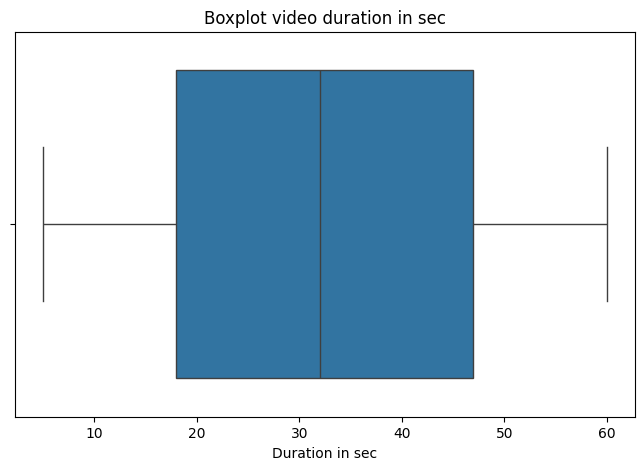

In [139]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['video_duration_sec'])
plt.xlabel('Duration in sec')
plt.title('Boxplot video duration in sec');
plt.show()

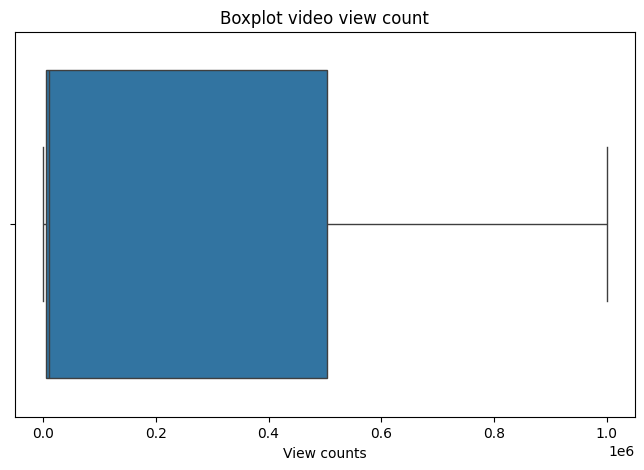

In [140]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['video_view_count'])
plt.xlabel('View counts')
plt.title('Boxplot video view count');
plt.show()

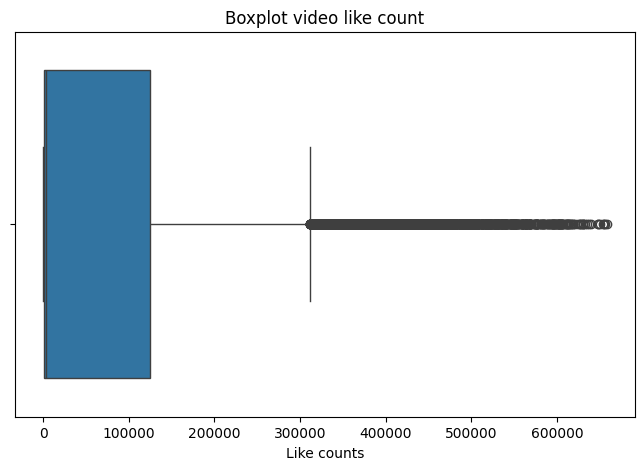

In [141]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['video_like_count'])
plt.xlabel('Like counts')
plt.title('Boxplot video like count');
plt.show()

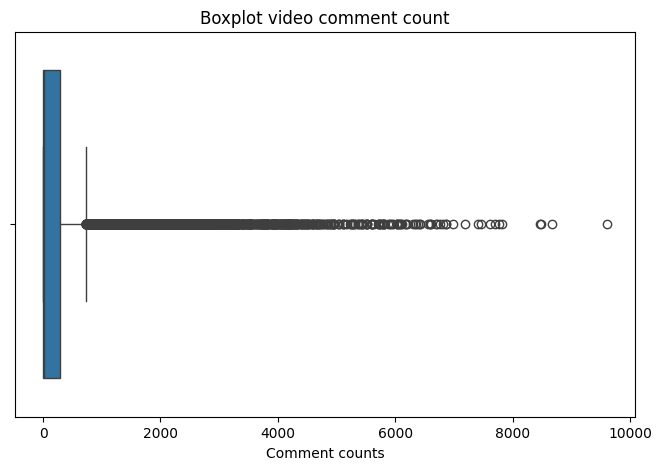

In [142]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['video_comment_count'])
plt.xlabel('Comment counts')
plt.title('Boxplot video comment count');
plt.show()

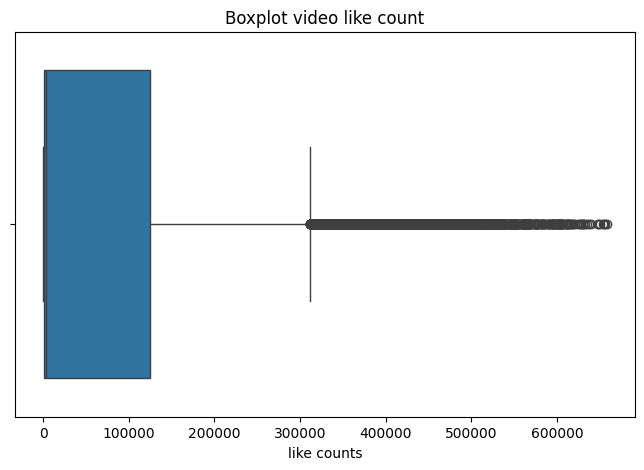

In [143]:
# Check for and handle outliers for video_like_count
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['video_like_count'])
plt.xlabel('like counts')
plt.title('Boxplot video like count');
plt.show()

In [144]:
# Check class balance for video_comment_count
data['video_comment_count'].value_counts().sort_values(ascending=False)

video_comment_count
0.0       3434
1.0       2222
2.0       1097
3.0        788
4.0        545
          ... 
3404.0       1
3088.0       1
1130.0       1
2905.0       1
3372.0       1
Name: count, Length: 2424, dtype: int64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

I'm going to use resampling to create class balance in the outcome variable, if needed.

In [145]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
class_distribution = data['verified_status'].value_counts()
minority_class = class_distribution.idxmin()
majority_class = class_distribution.idxmax()

minority_sample = data[data['verified_status'] == minority_class].sample(n=1, random_state=57)
majority_sample = data[data['verified_status'] == majority_class].sample(n=1, random_state=33)

# Upsample the minority class (which is "verified")
df_minority_class = data[data['verified_status'] == minority_class]
upsample_minority_class = df_minority_class.sample(n=(class_distribution[majority_class]), replace=True)

# Combine majority class with upsampled minority class
df_majority_class = data[data['verified_status'] == majority_class]
df_balance = pd.concat([df_majority_class, upsample_minority_class])

# Display new class counts
df_balance['verified_status'].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Now, I'm going to get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [146]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
df_balance[['verified_status', 'video_transcription_text']].groupby(by='verified_status')[['video_transcription_text']].agg({
    lambda x: x.str.len().mean()
})

video_transcription_text
                                <lambda>
verified_status                         
not verified                   89.401141
verified                       84.455882

Then, I'm going to extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [147]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df_balance.insert(5, "video_transcription_text_length", df_balance['video_transcription_text'].str.len())

In [148]:
# Display first few rows of dataframe after adding new column
df_balance.head()

# claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text  \
0  someone shared with me that drone deliveries a...   
1  someone shared with me that there are more mic...   
2  someone shared with me that american industria...   
3  someone shared with me that the metro of st. p...   
4  someone shared with me that the number of busi...   

   video_transcription_text_length verified_status author_ban_status  \
0                               97    not verified      under review   
1                              107    not verified            active   
2                              137    not verified            active   
3                              131    not verified            active   
4                              128    not verified            active   

   video_view_count  video_like_count  video_share_count  \
0          343296.0           19425.0              241.0   
1          140877.0           77355.0            19034.0   
2          902185.0           97690.0             2858.0   
3          437506.0          239954.0            34812.0   
4           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0

Let's visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

Text(0.5, 0, 'Length of the transcript')

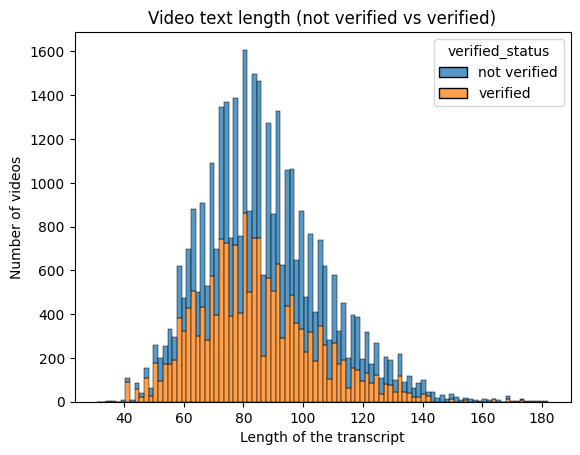

In [149]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
sns.histplot(data=df_balance, multiple="stack", x="video_transcription_text_length", kde=False, hue="verified_status", element="bars", legend=True)
plt.title('Video text length (not verified vs verified)')
plt.ylabel('Number of videos')
plt.xlabel('Length of the transcript')

### **Task 2b. Examine correlations**

Next, let's code a correlation matrix to help determine most correlated variables.

In [150]:
# Code a correlation matrix to help determine most correlated variables
df_balance.corr(numeric_only=True)

#  video_id  video_duration_sec  \
#                                1.000000 -0.001295           -0.015194   
video_id                        -0.001295  1.000000            0.014620   
video_duration_sec              -0.015194  0.014620            1.000000   
video_transcription_text_length -0.198473 -0.004548           -0.010458   
video_view_count                -0.696769  0.005593            0.010656   
video_like_count                -0.579252  0.011893            0.003038   
video_share_count               -0.502902  0.015529            0.001985   
video_download_count            -0.487648  0.012103            0.000579   
video_comment_count             -0.414345  0.018622           -0.008734   

                                 video_transcription_text_length  \
#                                                      -0.198473   
video_id                                               -0.004548   
video_duration_sec                                     -0.010458   
video_transcription_text_length                         1.000000   
video_view_count                                        0.247490   
video_like_count                                        0.202705   
video_share_count                                       0.171452   
video_download_count                                    0.173881   
video_comment_count                                     0.148201   

                                 video_view_count  video_like_count  \
#                                       -0.696769         -0.579252   
video_id                                 0.005593          0.011893   
video_duration_sec                       0.010656          0.003038   
video_transcription_text_length          0.247490          0.202705   
video_view_count                         1.000000          0.831266   
video_like_count                         0.831266          1.000000   
video_share_count                        0.709956          0.850172   
video_download_count                     0.688154          0.824958   
video_comment_count                      0.580663          0.703268   

                                 video_share_count  video_download_count  \
#                                        -0.502902             -0.487648   
video_id                                  0.015529              0.012103   
video_duration_sec                        0.001985              0.000579   
video_transcription_text_length           0.171452              0.173881   
video_view_count                          0.709956              0.688154   
video_like_count                          0.850172              0.824958   
video_share_count                         1.000000              0.706435   
video_download_count                      0.706435              1.000000   
video_comment_count                       0.619123              0.853989   

                                 video_comment_count  
#                                          -0.414345  
video_id                                    0.018622  
video_duration_sec                         -0.008734  
video_transcription_text_length             0.148201  
video_view_count                            0.580663  
video_like_count                            0.703268  
video_share_count                           0.619123  
video_download_count                        0.853989  
video_comment_count                         1.000000

Visualize a correlation heatmap of the data.

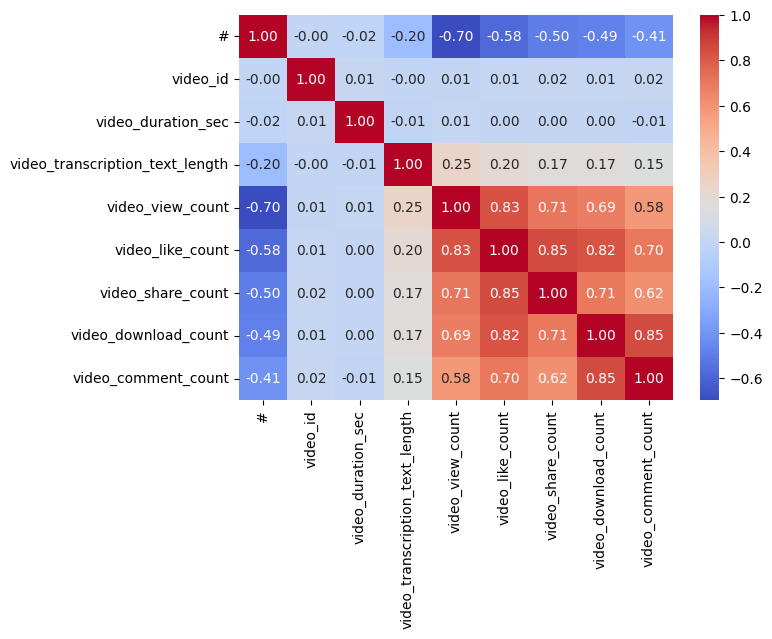

In [151]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(7, 5))
sns.heatmap(
    df_balance.corr(numeric_only=True),
    cmap='coolwarm',
    annot=True,
    fmt=".2f"
)
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Knowing this, we could conclude that the variables `video_like_count`, `video_share_counts`, 'video_download_count', and `video_comment_count` are highly correlated with each other. Which is something easy to tell; all of them are a natural consequence of the other. Anyway, some of these variables seem to be more correlated. For example, downloads and comments are very correlated, and likes have a higher correlation with all the variables. 

### **Task 3a. Select variables**

Set the Y and X variables.

Select the outcome variable.

In [152]:
# Select outcome variable
Y = df_balance[['verified_status']]

Select the features.

In [153]:
# Select features
X = df_balance[['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count', 
                "claim_status", "author_ban_status", "video_duration_sec"]]

# Display first few rows of features dataframe
X.head()

video_view_count  video_like_count  video_share_count  \
0          343296.0           19425.0              241.0   
1          140877.0           77355.0            19034.0   
2          902185.0           97690.0             2858.0   
3          437506.0          239954.0            34812.0   
4           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count claim_status author_ban_status  \
0                   1.0                  0.0        claim      under review   
1                1161.0                684.0        claim            active   
2                 833.0                329.0        claim            active   
3                1234.0                584.0        claim            active   
4                 547.0                152.0        claim            active   

   video_duration_sec  
0                  59  
1                  32  
2                  31  
3                  25  
4                  19

### **Task 3b. Train-test split**

Let's split the data into training and testing sets.

In [154]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=111)

Confirm that the dimensions of the training and testing sets are in alignment.

In [155]:
# Get shape of each training and testing set
print(f"x_train shape {x_train.shape}")
print(f"x_test shape {x_test.shape}")
print(f"y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")

x_train shape (25037, 8)
x_test shape (10731, 8)
y_train shape (25037, 1)
y_test shape (10731, 1)


### **Task 3c. Encode variables**

Check the data types of the features.

In [156]:
# Check data types
X.dtypes

video_view_count        float64
video_like_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
claim_status             object
author_ban_status        object
video_duration_sec        int64
dtype: object

In [157]:
# Get unique values in `claim_status`
unique_values_claims = X['claim_status'].unique()
unique_values_claims

array(['claim', 'opinion'], dtype=object)

In [158]:
# Get unique values in `author_ban_status`
unique_values_author_ban = X['author_ban_status'].unique()
unique_values_author_ban

array(['under review', 'active', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

In [159]:
# Select the training features that needs to be encoded
x_train_to_encode = x_train[['claim_status', 'author_ban_status']]

# Display first few rows
x_train_to_encode.head()

claim_status author_ban_status
8593         claim            active
14304      opinion            active
16943      opinion            active
11563      opinion            active
4936         claim            active

In [160]:
# Set up an encoder for one-hot encoding the categorical features
x_encoder = OneHotEncoder(drop='first', sparse_output=False)
x_encoder

OneHotEncoder(drop='first', sparse_output=False)

In [161]:
# Fit and transform the training features using the encoder
x_train_encoded = x_encoder.fit_transform(x_train_to_encode)

In [162]:
x_train_encoded.shape

(25037, 3)

In [163]:
# Get feature names from encoder
x_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [164]:
# Place encoded training features (which is currently an array) into a dataframe
x_train_encoded = pd.DataFrame(x_train_encoded, columns=x_encoder.get_feature_names_out())

# Display first few rows of encoded training features
x_train_encoded.head(5)

claim_status_opinion  author_ban_status_banned  \
0                   0.0                       0.0   
1                   1.0                       0.0   
2                   1.0                       0.0   
3                   1.0                       0.0   
4                   0.0                       0.0   

   author_ban_status_under review  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0

In [165]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
x_train = x_train.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True)
x_train.head(3)

video_view_count  video_like_count  video_share_count  \
0          813027.0          263278.0            67558.0   
1            3034.0            1032.0              153.0   
2            7464.0            1725.0              663.0   

   video_download_count  video_comment_count  video_duration_sec  
0                3859.0               1690.0                  35  
1                  26.0                  1.0                  30  
2                  32.0                  2.0                  17

In [166]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
x_train_final = pd.concat([x_train, x_train_encoded], axis=1)

# Display first few rows
x_train_final.head(5)

video_view_count  video_like_count  video_share_count  \
0          813027.0          263278.0            67558.0   
1            3034.0            1032.0              153.0   
2            7464.0            1725.0              663.0   
3            7614.0             535.0              206.0   
4           81095.0           29950.0             2660.0   

   video_download_count  video_comment_count  video_duration_sec  \
0                3859.0               1690.0                  35   
1                  26.0                  1.0                  30   
2                  32.0                  2.0                  17   
3                   6.0                  0.0                  25   
4                 431.0                 83.0                  42   

   claim_status_opinion  author_ban_status_banned  \
0                   0.0                       0.0   
1                   1.0                       0.0   
2                   1.0                       0.0   
3                   1.0                       0.0   
4                   0.0                       0.0   

   author_ban_status_under review  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0

Check the data type of the outcome variable.

In [167]:
# Check data type of outcome variable
Y.dtypes

verified_status    object
dtype: object

In [168]:
# Get unique values of outcome variable
outcome_unique_values = Y['verified_status'].unique()
outcome_unique_values

array(['not verified', 'verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [169]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [170]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train = y_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_train_final = y_train.ravel()

# Display the encoded training outcome variable
y_train_final

array([0., 0., 1., ..., 0., 0., 0.])

### **Task 3d. Model building**

Let's construct a model and fit it to the training set.

In [171]:
# Construct a logistic regression model and fit it to the training set
clf = LogisticRegression().fit(x_train_final, y_train_final)

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [172]:
# Print the coefficient
print(clf.coef_)
# Print the intercept
print(clf.intercept_)

[[-2.00322178e-06 -5.50212518e-07  7.05443187e-06 -1.92059788e-04
   3.28357483e-04  7.99206568e-03  6.30531943e-04 -4.77003426e-05
  -2.75675299e-05]]
[0.00038503]


### **Taks 4a. Results and evaluation**

Encode categorical features in the testing set using an appropriate method.

In [173]:
# Select the testing features that needs to be encoded
x_test_to_encode = x_test[['claim_status', 'author_ban_status']]

# Display first few rows
x_test_to_encode.head(3)

claim_status author_ban_status
14141      opinion            active
18352      opinion            active
2941         claim            active

In [174]:
# Transform the testing features using the encoder
x_test_encoder = OneHotEncoder(drop='first', sparse_output=False)
x_test_encoded = x_test_encoder.fit_transform(x_test_to_encode)

# Display first few rows of encoded testing features
x_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [175]:
# Place encoded testing features (which is currently an array) into a dataframe
x_test_encoded = pd.DataFrame(x_test_encoded, columns=x_test_encoder.get_feature_names_out())

# Display first few rows
x_test_encoded.head()

claim_status_opinion  author_ban_status_banned  \
0                   1.0                       0.0   
1                   1.0                       0.0   
2                   0.0                       0.0   
3                   0.0                       0.0   
4                   1.0                       0.0   

   author_ban_status_under review  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0

In [176]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
x_test = x_test.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True)
x_test.head()

video_view_count  video_like_count  video_share_count  \
0            5646.0            2330.0              289.0   
1            1401.0             321.0               57.0   
2          388762.0          105189.0            30151.0   
3          688513.0           31156.0              423.0   
4            8655.0             547.0              112.0   

   video_download_count  video_comment_count  video_duration_sec  
0                   1.0                  0.0                  43  
1                   2.0                  0.0                  42  
2                2231.0               1035.0                  38  
3                 205.0                 52.0                  39  
4                  11.0                  1.0                  33

In [177]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
x_test_final = pd.concat([x_test, x_test_encoded], axis=1)

# Display first few rows
x_test_final.head()

video_view_count  video_like_count  video_share_count  \
0            5646.0            2330.0              289.0   
1            1401.0             321.0               57.0   
2          388762.0          105189.0            30151.0   
3          688513.0           31156.0              423.0   
4            8655.0             547.0              112.0   

   video_download_count  video_comment_count  video_duration_sec  \
0                   1.0                  0.0                  43   
1                   2.0                  0.0                  42   
2                2231.0               1035.0                  38   
3                 205.0                 52.0                  39   
4                  11.0                  1.0                  33   

   claim_status_opinion  author_ban_status_banned  \
0                   1.0                       0.0   
1                   1.0                       0.0   
2                   0.0                       0.0   
3                   0.0                       0.0   
4                   1.0                       0.0   

   author_ban_status_under review  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0

Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [178]:
# Use the logistic regression model to get predictions on the encoded testing set
predictions = clf.predict(x_test_final)

Display the predictions on the encoded testing set.

In [179]:
# Display the predictions on the encoded testing set
predictions

array([1., 1., 0., ..., 1., 1., 0.])

Display the true labels of the testing set.

In [180]:
# Display the true labels of the testing set
y_test

verified_status
14141        verified
18352        verified
2941         verified
2058     not verified
18854        verified
...               ...
6352         verified
1276     not verified
13573    not verified
12725        verified
7033     not verified

[10731 rows x 1 columns]

Encode the true labels of the testing set so it can be compared to the predictions.

In [181]:
# Encode the testing outcome variable
y_test = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test

array([1., 1., 1., ..., 0., 1., 0.])

Now, let's confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [182]:
# Get shape of each training and testing set
print(f"y test sample shape: {y_test.shape}, y prediction sample shape: {predictions.shape}")

y test sample shape: (10731,), y prediction sample shape: (10731,)


### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

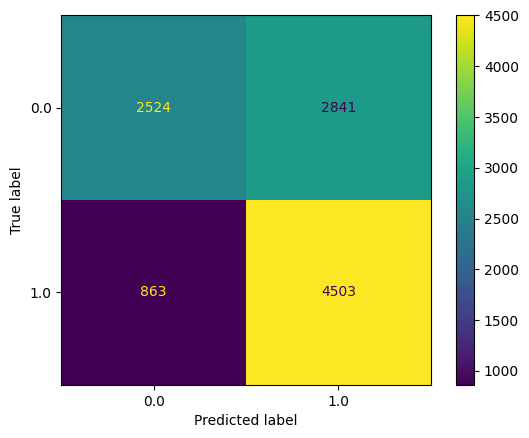

In [183]:
# Compute values for confusion matrix
cm = metrics.confusion_matrix(y_test, predictions, labels = clf.classes_)

# Create display of confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()

In [185]:
# Get the accuracy score of the regression
(4503 + 2524) / (2524 + 863 + 2841 + 4503)

0.6548317957319915

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [186]:
# Create a classification report
target_labels = ["verified", "not verified"]
print(classification_report(y_test, predictions, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.75      0.47      0.58      5365
not verified       0.61      0.84      0.71      5366

    accuracy                           0.65     10731
   macro avg       0.68      0.65      0.64     10731
weighted avg       0.68      0.65      0.64     10731



### **Task 4c. Interpret model coefficients**

In [187]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":clf.feature_names_in_, "Model Coefficient":clf.coef_[0]})

Feature Name  Model Coefficient
0                video_view_count      -2.003222e-06
1                video_like_count      -5.502125e-07
2               video_share_count       7.054432e-06
3            video_download_count      -1.920598e-04
4             video_comment_count       3.283575e-04
5              video_duration_sec       7.992066e-03
6            claim_status_opinion       6.305319e-04
7        author_ban_status_banned      -4.770034e-05
8  author_ban_status_under review      -2.756753e-05

### **Task 4d. Conclusion**

- Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.
- Despite the last point, the outcome can be balanced by upsampling the minority class.
- All the counts used as features for the train and the test sample (likes, comments, shares, downloads, and views) are highly corralated between them. This makes sense because the more popular a video is, the higher the numbers in other counts. The same is applicable to a low number of views.
- The model is capable of predicting the most outcomes, with an accuracy percentage of over 60%. ns. 